In [1]:
from os import listdir   
import h5py
import imageio
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from re import findall

In [13]:
parent_directory = listdir(['./CatAndDog/training_set/training_set/]')
print(cat_directory)

    

['cats', 'dogs']


In [10]:
str1 = "cats"
print(str1[:-1])

cat


In [30]:
def generate_numpy_data(foldernameList,root = './',num_px = 64,train_test_split = 1,verbose = False):
    """
    This function will generate the array of pixels (nx,num_px,num_px,3) for train and test set
    We will do this by taking 70% of the y1 photos and mix it with 70% y0 photos
    The other 30% will be used for testing (or holdout)
    
    Arguments:
    pathList -- list of String of path. I will assume they only contain the folder name.
    num_px   -- the resized photo will be in num_px x num_px
                If no arguments is supplied, leave to 100px
    Returns:
    data dictionary dataset
            "train_x": contain the 4D array of train x data
            "train_y": contain the 4D array of train y data - label
            "test_x": contain the 4D array of test data
            "test_y": contain the 4D array of test data
    """
    
    cleanedFoldernameList = foldernameList #this time round it's clean
    
    
    _train_x_set = list()   #holder for the pixel array
    _test_x_set = list()   
    _train_y_set = list()
    _test_y_set = list() 
    _train_class_set = list()
    _test_class_set = list()
    
    label = 0
    ###We assume that first folder is label 0, second label 1, etc, and our folder are 1_*,2_*,etc
    for foldername in cleanedFoldernameList:
        folder = listdir(f'{root}/{foldername}/')
        #print(folder)
        folder_len = len(folder)
        for i in range(folder_len):
            fname = f'{root}/{foldername}/{folder[i]}'
            try:
                img = imageio.imread(fname)
                image = np.array(img)
                resized_image = np.array(Image.fromarray(image).resize((num_px,num_px)))
            except ValueError:
                print(f'{root}/{foldername}/{folder[i]} has file extension issue')
                continue
            else:
                if resized_image.shape != (num_px,num_px,3):
                    print(f'{root}/{foldername}/{folder[i]} has malformed dimensions: {resized_image.shape}')
                    continue
                classname = foldername[:-1]  #remove the s in cats and dogs
                if i < folder_len*train_test_split:
                    _train_x_set.append(resized_image)
                    _train_y_set.append(label)
                    _train_class_set.append(classname.encode("utf-8"))
                else:
                    _test_x_set.append(resized_image)
                    _test_y_set.append(label)
                    _test_class_set.append(classname.encode("utf-8"))
            finally:
                if verbose and i%250==0 and i != 0:
                    print(f'Processed {i} photos from {root}/{foldername}')
        label+=1
           
        
    assert(len(_train_x_set)==len(_train_y_set))
    assert(len(_train_x_set)==len(_train_class_set))
    assert(len(_test_x_set)==len(_test_y_set))
    assert(len(_test_x_set)==len(_test_class_set))

    #convert to np array
    train_x_set = np.array(_train_x_set)
    train_y_set = np.array(_train_y_set).reshape(1,-1)
    test_x_set = np.array(_test_x_set)
    test_y_set = np.array(_test_y_set).reshape(1,-1)
            
    dataset = dict()
            
    dataset["train_x"] = train_x_set
    dataset["train_y"] = train_y_set
    dataset["test_x"] = test_x_set
    dataset["test_y"] = test_y_set
    dataset["train_class"] = _train_class_set
    dataset["test_class"] = _test_class_set
    
    return dataset

In [12]:
def generate_h5_data(numpy_dataset,filename):
    """
    I will do the documentation later
    files output are train_{}vnon{}.h5 and test_{}vnon{}.h5
    """
    assert(type(filename) is str)
    try:
        train_filepath = f'./train_{filename}.h5'
        test_filepath = f'./test_{filename}.h5'

        h5train = h5py.File(train_filepath, 'w')
        h5train.create_dataset('set_x',data= numpy_dataset["train_x"])
        h5train['set_y'] = numpy_dataset["train_y"]
        h5train['class'] = numpy_dataset["train_class"]
       

        h5test = h5py.File(test_filepath, 'w')
        h5test.create_dataset('set_x',data= numpy_dataset["test_x"])
        h5test['set_y'] = numpy_dataset["test_y"]
        h5test['class'] = numpy_dataset["test_class"]
    finally:
        h5train.close()
        h5test.close()

In [31]:
catvdog_python_dataset = generate_numpy_data(listdir('./CatAndDog/training_set/training_set/'),root = './CatAndDog/training_set/training_set/',num_px=128,verbose = True)

Processed 250 photos from ./CatAndDog/training_set/training_set//cats
Processed 500 photos from ./CatAndDog/training_set/training_set//cats
Processed 750 photos from ./CatAndDog/training_set/training_set//cats
Processed 1000 photos from ./CatAndDog/training_set/training_set//cats
Processed 1250 photos from ./CatAndDog/training_set/training_set//cats
Processed 1500 photos from ./CatAndDog/training_set/training_set//cats
Processed 1750 photos from ./CatAndDog/training_set/training_set//cats
Processed 2000 photos from ./CatAndDog/training_set/training_set//cats
Processed 2250 photos from ./CatAndDog/training_set/training_set//cats
Processed 2500 photos from ./CatAndDog/training_set/training_set//cats
Processed 2750 photos from ./CatAndDog/training_set/training_set//cats
Processed 3000 photos from ./CatAndDog/training_set/training_set//cats
Processed 3250 photos from ./CatAndDog/training_set/training_set//cats
Processed 3500 photos from ./CatAndDog/training_set/training_set//cats
Processed

In [32]:
generate_h5_data(catvdog_python_dataset,"catVdog")

In [33]:
catvdog_python_dataset = generate_numpy_data(listdir('./CatAndDog/test_set/test_set/'),root = './CatAndDog/test_set/test_set/',num_px=128,verbose = True)

Processed 250 photos from ./CatAndDog/test_set/test_set//cats
Processed 500 photos from ./CatAndDog/test_set/test_set//cats
Processed 750 photos from ./CatAndDog/test_set/test_set//cats
Processed 1000 photos from ./CatAndDog/test_set/test_set//cats
./CatAndDog/test_set/test_set//cats/_DS_Store has file extension issue
Processed 250 photos from ./CatAndDog/test_set/test_set//dogs
Processed 500 photos from ./CatAndDog/test_set/test_set//dogs
Processed 750 photos from ./CatAndDog/test_set/test_set//dogs
Processed 1000 photos from ./CatAndDog/test_set/test_set//dogs
./CatAndDog/test_set/test_set//dogs/_DS_Store has file extension issue


In [34]:
generate_h5_data(catvdog_python_dataset,"catVdog")

In [38]:
#NO NEED FOR THIS EXERCISE
def load_catvdog_h5_data(h5filepath):
    h5file = h5py.File(h5filepath, "r")
    try:
        class_fieldname,x_fieldname,y_fieldname, = h5file.keys()   #this order is Gfriend files
        print("The keys are: ", h5file.keys())
        set_x_orig = np.array(h5file[x_fieldname][:]) # your test set features
        set_y_orig = np.array(h5file[y_fieldname][:]) # your test set labels
        set_class = list(h5file[class_fieldname][:])
        print("The shape of x_field",set_x_orig.shape)
        print("The shape of y_field",set_y_orig.shape)
        print("Len of class list: ",len(set_class))
        #show_first_20(set_x_orig,set_y_orig[0],offset)
    finally:
        h5file.close()
    return set_x_orig,set_y_orig,set_class

In [40]:
train_x_orig,train_y_orig,classes = load_catvdog_h5_data('./test_catVdog.h5')

The keys are:  <KeysViewHDF5 ['class', 'set_x', 'set_y']>
The shape of x_field (2023, 128, 128, 3)
The shape of y_field (1, 2023)
Len of class list:  2023


In [41]:
def show_20_images(img_array,label_array,class_array,offset=0):
    
    assert(len(img_array)==len(label_array))
    assert(len(img_array)==len(class_array))
    
    datalen = len(img_array)
    numOfIter = min(datalen,20)
    
    if numOfIter < 20:
        offset = 0  #if numOfIter < 20, it means it equals datalen, which is less than 20 fed in. So no need offset
        
    numOfRow = numOfIter//4 + (numOfIter%4 != 0)   #a ceiling function
    
    plt.rcParams['figure.figsize'] = (60.0, 100.0) 
    print(img_array.shape)
    num_px = img_array.shape[1] #shape is (m, num_px,num_px,3)
    for i in range(numOfIter):
        plt.subplot(5,4,i+1)  #plot 5 by 4 grid
        #plt.imshow(img_array[i+offset])
        plt.imshow(img_array[i+offset].reshape(num_px,num_px,3), interpolation='nearest')  #take only the num_px
        plt.axis('off')
        #print(f'IMG {i+1} is labelled {label_array[i+offset]}')
        _class = class_array[i+offset].decode("utf-8")
        plt.title("Class: " + _class,fontsize = 50)
        
def review_h5_data(h5filepath,offset=0):
    """
    Plot the first 20 images (or entire set if the files have less than 20 images)
    offset - starting index of the 20 photos(no boundary checking condition is implemented.
    """
    
    h5file = h5py.File(h5filepath, "r")
    try:
        class_fieldname,x_fieldname,y_fieldname = h5file.keys()
        print("The keys are: ", h5file.keys())
        set_x_orig = np.array(h5file[x_fieldname][:]) # your test set features
        set_y_orig = np.array(h5file[y_fieldname][:]) # your test set labels
        set_class = list(h5file[class_fieldname][:])
        #print(set_class)
        print("The shape of x_field",set_x_orig.shape)
        print("The shape of y_field",set_y_orig.shape)
        show_20_images(set_x_orig,set_y_orig[0],set_class,offset)
    finally:
        h5file.close()

The keys are:  <KeysViewHDF5 ['class', 'set_x', 'set_y']>
The shape of x_field (8005, 128, 128, 3)
The shape of y_field (1, 8005)
(8005, 128, 128, 3)


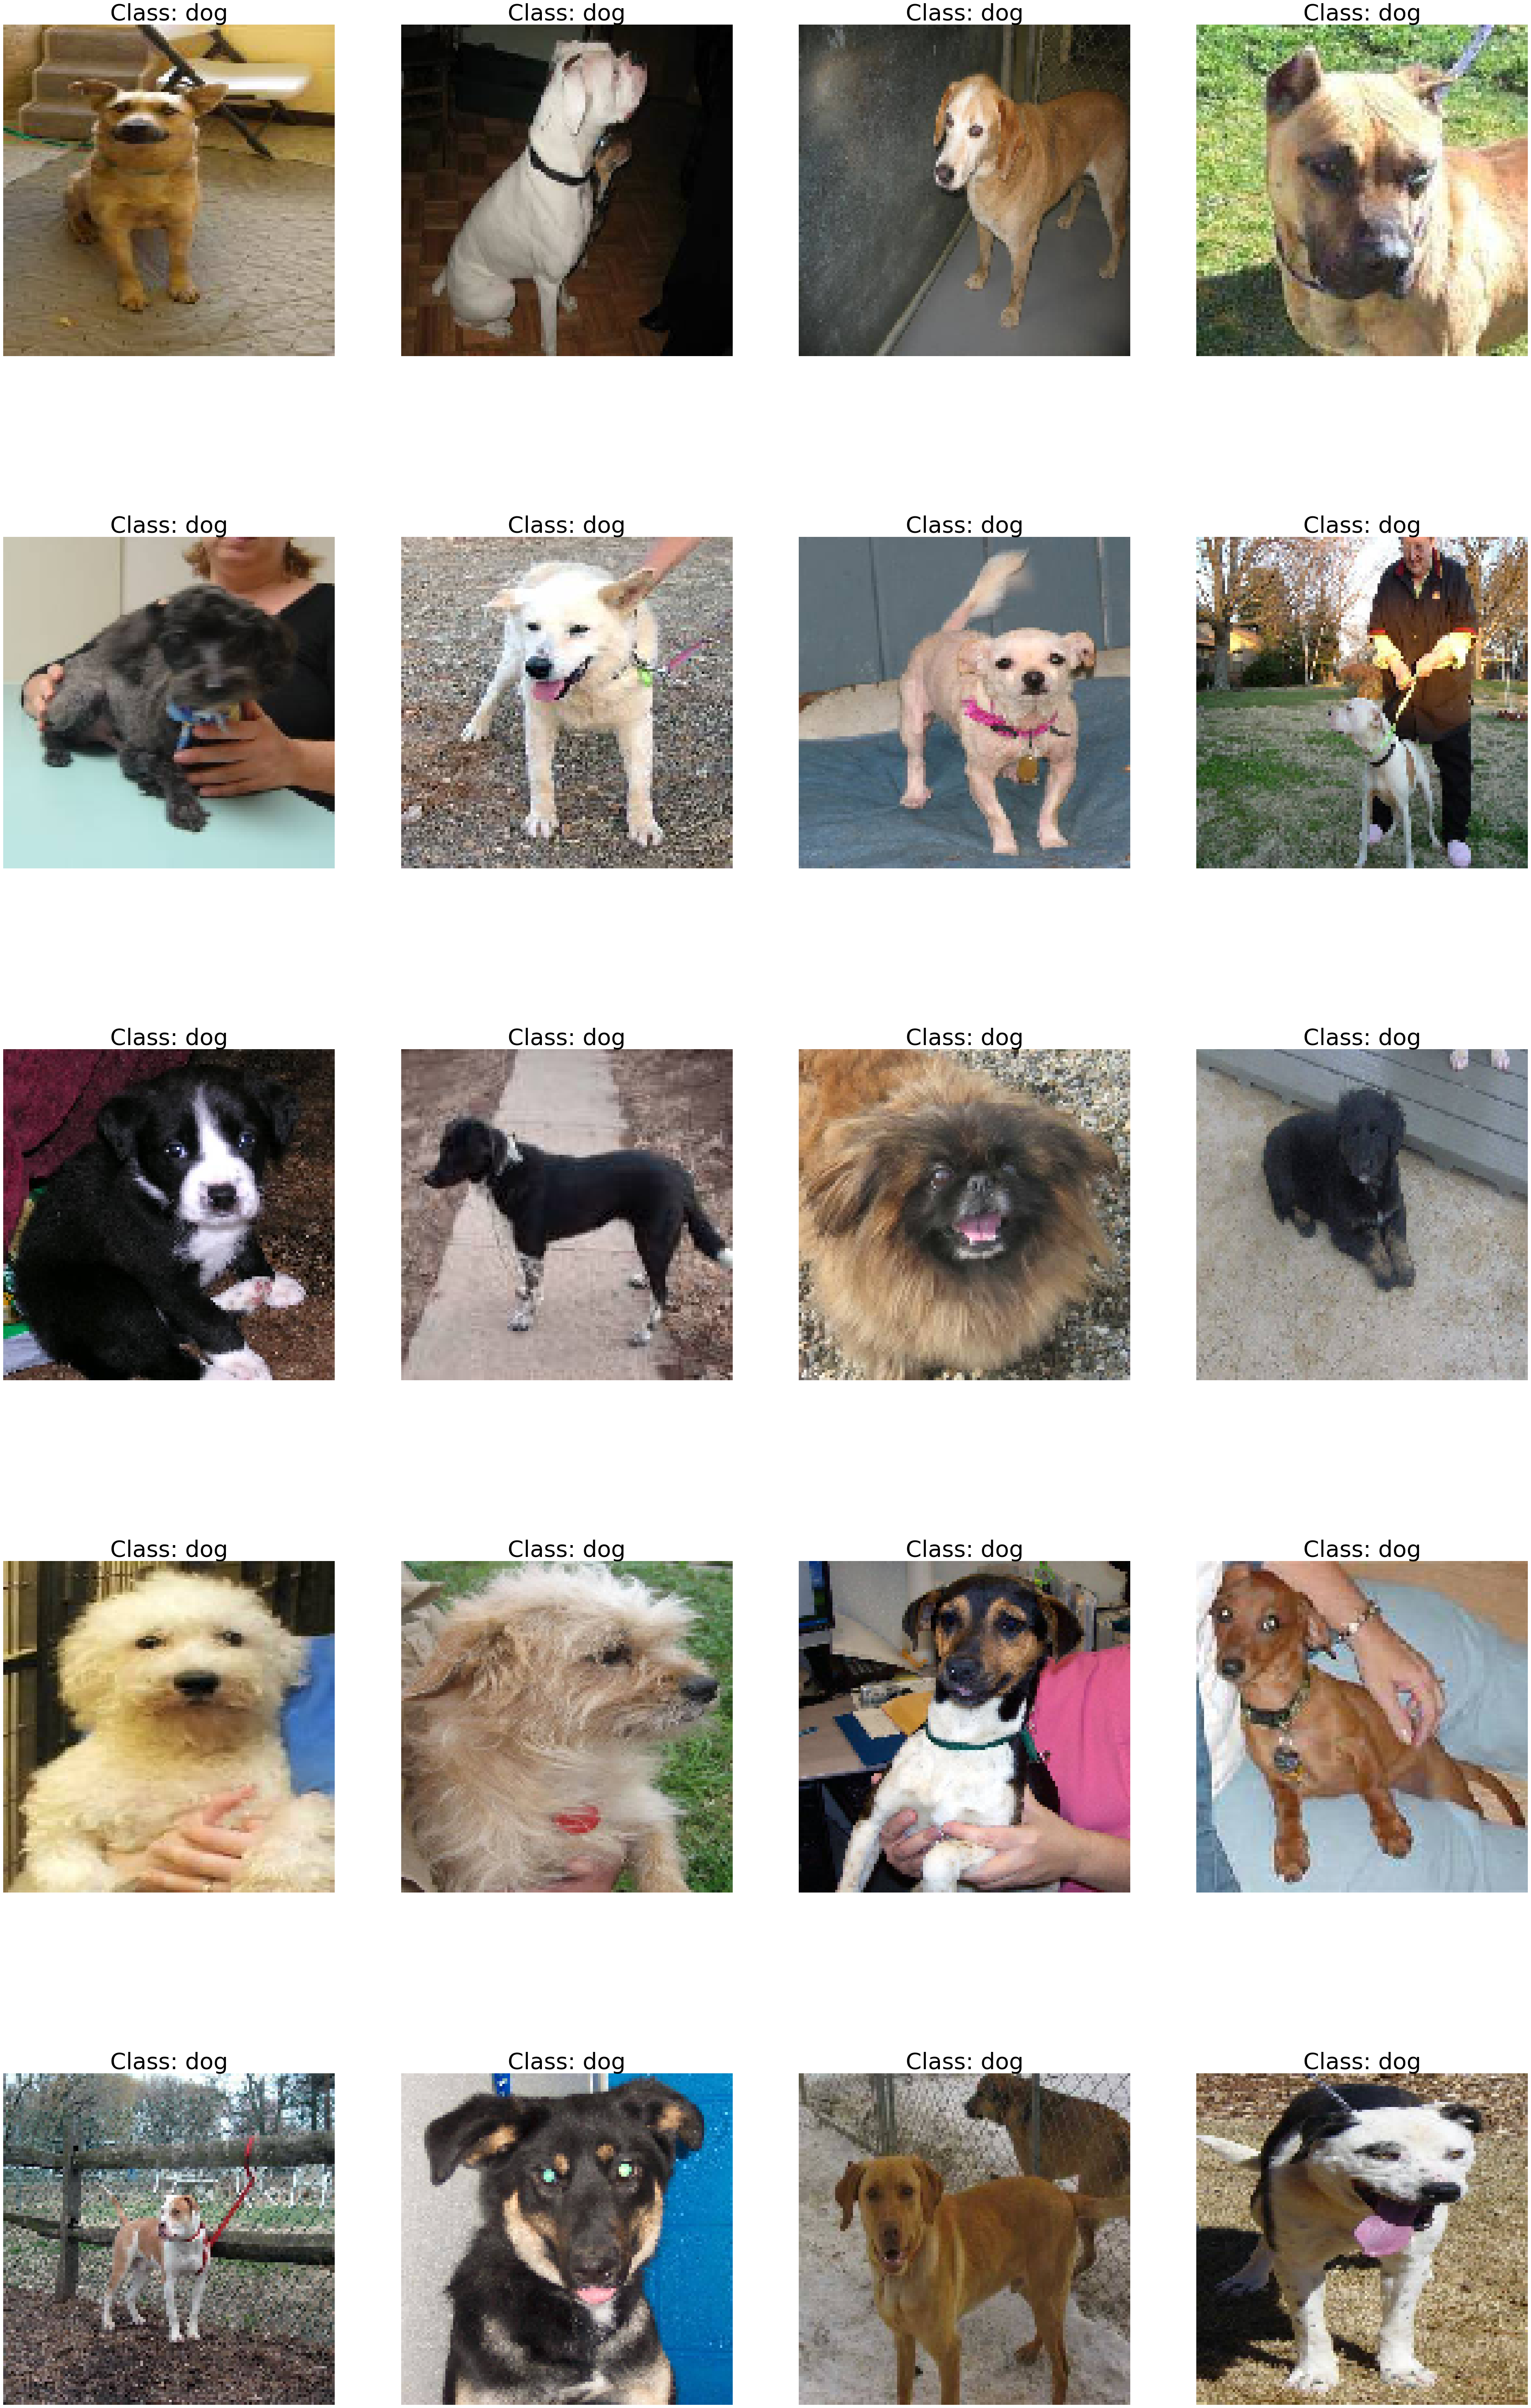

In [43]:
review_h5_data('./train_catVdog.h5',offset = 5000)